# ROC AND AUC
假设我们通过训练集训练了一个二分类模型，在测试集上进行预测每个样本所属的类别，输出了属于类别”1“的概率。现在假设当P>=0.5时，预测的类标签为”1“。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#测试样本的数量
parameter=40

## 随机生成结果集

In [5]:
data=pd.DataFrame(index=range(0,parameter),columns=('probability','The_true_label'))
data['The_true_label']=np.random.randint(0,2,size=len(data))
data['probability']=np.random.choice(np.arange(0.1,1,0.1),len(data['probability']))

In [6]:
data

,probability,The_true_label
0,0.9,1
1,0.2,1
2,0.6,0
3,0.9,1
4,0.2,1
5,0.1,1
6,0.6,1
7,0.5,0
8,0.5,0
9,0.1,0


## 计算混淆矩阵

In [10]:
cm=np.arange(4).reshape(2,2)

cm[0,0]=len(data[data['The_true_label']==0][data['probability']<0.5])#TN
cm[0,1]=len(data[data['The_true_label']==0][data['probability']>=0.5])#FP
cm[1,0]=len(data[data['The_true_label']==1][data['probability']<0.5]) #FN
cm[1,1]=len(data[data['The_true_label']==1][data['probability']>=0.5])#TP

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5,15,'Predicted label')

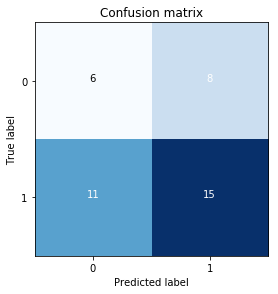

In [11]:
# 绘制混淆矩阵
import itertools
classes = [0,1]
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in  itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### threshold=0.5上的假正率和真正率容易计算，为： FPR=6/(5+6)=0.55，TPR=13/(13+6)=0.68

> ROC曲线是一系列threshold下的（FPR，TPR）数值点的连线。此时的threshold的取值分别为测试数据集中各样本的预测概率。
但，取各个概率的顺序是从大到小的。
- 按概率值排序

In [13]:
data.sort_values('probability',inplace=True,ascending=False)

> 此时，threshold依次取0.9，0.9，0.9，0.9，0.9，0.9，0.8，0.8，0.7，...。
比如，当threshold=0.9（第3个0.9），一个”0“预测错误，两个”1“预测正确，FPR=1/11=0.09，TPR=2/19=0.11。
当threshold=0.9（第5个0.9），一个”0“预测错误，四个”1“预测正确，FPR=1/11=0.09，TPR=4/19=0.21。 
当threshold=0.6（第1个0.6），三个”0“预测错误，九个”1“预测正确，FPR=3/11=0.27，TPR=9/19=0.47。
- 计算全部概率值下的FPR和TPR

In [22]:
data

,probability,The_true_label
0,0.9,1
10,0.9,1
3,0.9,1
28,0.9,1
31,0.8,1
25,0.8,0
15,0.8,1
14,0.8,1
20,0.8,0
39,0.7,1


In [26]:
TPRandFPR=pd.DataFrame(index=range(len(data)),columns=('TP','FP'))

for j in range(len(data)):
    data1=data.head(n=j+1)
    FP=len(data1[data1['The_true_label']==0] [data1['probability']>=data1.head(len(data1))['probability']])/float(len(data[data['The_true_label']==0]))
    
    TP=len(data1[data1['The_true_label']==1][data1['probability']>=data1.head(len(data1))['probability']])/float(len(data[data['The_true_label']==1])) 
    TPRandFPR.iloc[j]=[TP,FP]

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [27]:
TPRandFPR

,TP,FP
0,0.0384615,0
1,0.0769231,0
2,0.115385,0
3,0.153846,0
4,0.192308,0
5,0.192308,0.0714286
6,0.230769,0.0714286
7,0.269231,0.0714286
8,0.269231,0.142857
9,0.307692,0.142857


## 画出最终的ROC曲线和计算AUC值

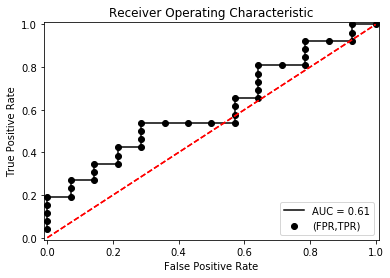

In [28]:
from sklearn.metrics import auc
AUC= auc(TPRandFPR['FP'],TPRandFPR['TP'])

plt.scatter(x=TPRandFPR['FP'],y=TPRandFPR['TP'],label='(FPR,TPR)',color='k')
plt.plot(TPRandFPR['FP'], TPRandFPR['TP'], 'k',label='AUC = %0.2f'% AUC)
plt.legend(loc='lower right')

plt.title('Receiver Operating Characteristic')
plt.plot([(0,0),(1,1)],'r--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,01.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
